In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("exams.csv")
df.isnull().sum()

gender            0
race/ethnicity    0
math score        0
reading score     0
writing score     0
dtype: int64

In [4]:
df = pd.get_dummies(df,columns=["gender"],prefix='',prefix_sep='',dtype=int)
df = pd.get_dummies(df,columns=["race/ethnicity"],prefix='',prefix_sep='',dtype=int)
df

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,67,67,63,0,1,1,0,0,0,0
1,40,59,55,1,0,0,0,0,1,0
2,59,60,50,0,1,0,0,0,0,1
3,77,78,68,0,1,0,1,0,0,0
4,78,73,68,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,73,70,65,0,1,0,0,1,0,0
996,85,91,92,0,1,0,0,0,1,0
997,32,35,41,1,0,0,0,1,0,0
998,73,74,82,1,0,0,0,1,0,0


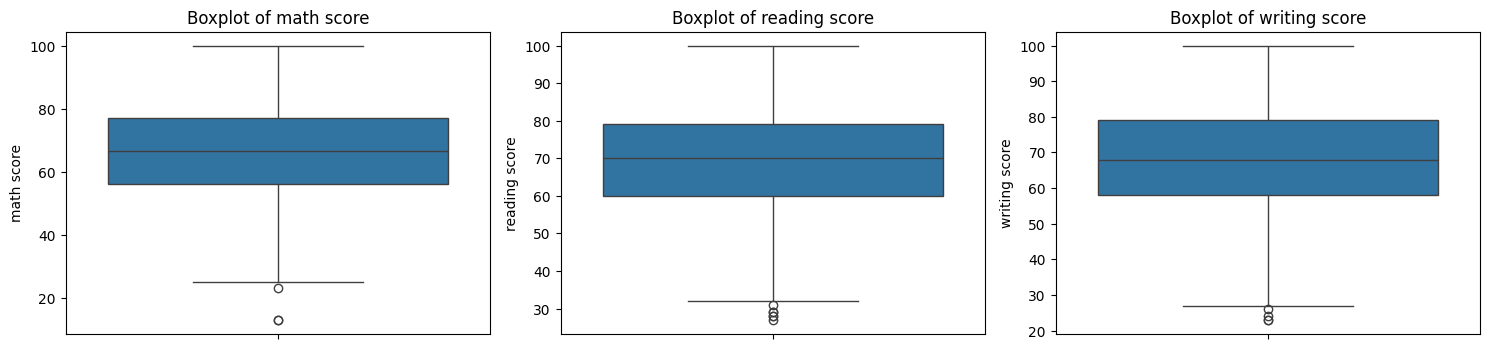

In [5]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:3], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [6]:
Q1 = df[['math score', 'reading score', 'writing score']].quantile(0.25)
Q3 = df[['math score', 'reading score', 'writing score']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df[['math score', 'reading score', 'writing score']] < lower_bound) | 
                  (df[['math score', 'reading score', 'writing score']] > upper_bound)).any(axis=1)]

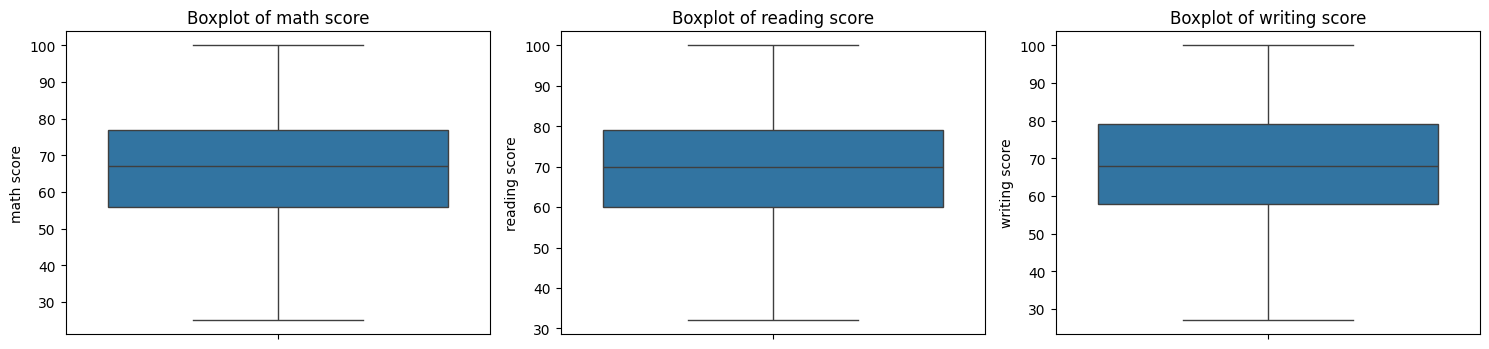

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.columns[:3], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_cleaned, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()